# 3. Cluster analysis

General info may be found in the following blogposts:  
https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/  
https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/  
https://towardsdatascience.com/machine-learning-algorithms-part-12-hierarchical-agglomerative-clustering-example-in-python-1e18e0075019  
https://medium.com/@sametgirgin/hierarchical-clustering-model-in-5-steps-with-python-6c45087d4318  

## Code

In [286]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

from sklearn.cluster import AgglomerativeClustering

In [287]:
import prepostprocessing.pre_processing as preproc

In [288]:
pca_df_area1 = preproc.load_obj("mineralogy_pca_area1_df")
metadata_area1 = preproc.load_obj("metadata_area1")

pca_df_area2 = preproc.load_obj("mineralogy_pca_area2_df")
metadata_area2 = preproc.load_obj("metadata_area2")

pca_df_area3 = preproc.load_obj("mineralogy_pca_area3_df")
metadata_area3 = preproc.load_obj("metadata_area3")

pca_df_area4 = preproc.load_obj("mineralogy_pca_area4_df")
metadata_area4 = preproc.load_obj("metadata_area4")

pca_df_area5 = preproc.load_obj("mineralogy_pca_area5_df")
metadata_area5 = preproc.load_obj("metadata_area5")

pca_df = preproc.load_obj("mineralogy_pca_df1")
metadata = preproc.load_obj("metadata")

Fe_num = preproc.load_obj("Fe_num")
Fe_num_pca_df = preproc.load_obj("Fe_num_pca_df")

MALI = preproc.load_obj("MALI")
MALI_pca_df = preproc.load_obj("MALI_pca_df")

ASI = preproc.load_obj("ASI")
ASI_pca_df = preproc.load_obj("ASI_pca_df")

mineralogy_clr = preproc.load_obj("mineralogy_clr1")

In [289]:
area_numbers = pd.read_excel("../_INTERPOLATION/area_subdivided.xlsx", index_col=0, usecols=[0, 24, 29])
#area_numbers = pd.read_excel("../_INTERPOLATION/area1.xlsx", index_col=None, usecols=[0, 24, 29])

### Fe-number

In [111]:
Fe_num_pca_df1 = Fe_num_pca_df.iloc[:, 0: 3]
Fe_num_pca_df1

,PC01,PC02,PC03
1,-0.357349,-0.127711,-2.176173
2,3.011903,-1.733041,0.567811
3,1.485280,0.098302,-2.111218
4,0.453717,0.301440,-0.895292
5,0.462341,-0.098477,-2.439300
...,...,...,...
4655,-3.626322,0.172876,0.361214
4656,-4.027023,0.088159,0.213600
4657,-3.740683,-0.611330,0.860084
4658,-2.649742,0.373452,0.704946


In [112]:
metadata

,type_granite,time,massif,sampler,others,sampler+year
1,Granite leucogranitic,K,NaN,NaN,NaN,"V.N.Musin,1970"
2,Granite leucocratic,Tr,NaN,V.I.Zhigalova,NaN,"E.A.Ivanov,1969"
3,Granite leucocratic coarse-grained,K,Omsukchan massif,P.M.Bosek,NaN,"O.S.Gracheva,1948"
4,Granite leucocratic,K,Buksandzhin massif,A.Kh.Brovtman,NaN,"A.F.Mikhaylov,1948"
5,Granite-porphyry micropegmatitic,K,Attykveem massif,L.G.Semenova,0th.:S-0.16,"A.I.Sadovsky,1963"
...,...,...,...,...,...,...
4655,Diorite,K,Egdegkych massif,NaN,Oth.:co2-0.12,"V.A.lgnat'ev,1964"
4656,Quartz diorite,K,Verkhneplotnikovsky massif,NaN,NaN,"A.A.Syas'ko,1969"
4657,Diorite,J,NaN,NaN,"Oth.:co2-0.02,so3-0.0l","N.N.Remizov,1967"
4658,Diorite,K,NaN,NaN,NaN,"A.P.Osipov,1966"


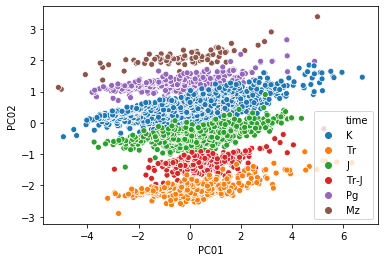

In [113]:
sns.scatterplot(x="PC01", y="PC02", data=Fe_num_pca_df1, hue=metadata["time"])
plt.show();

In [114]:
area_numbers[area_numbers["time"] == "K"].index

Int64Index([ 370,  477, 1573,    1,    7,    8,   13,   16,   20,   28,
            ...
            4310, 4317, 4385, 4429, 4516, 4522, 4562, 4594, 4628, 4643],
           dtype='int64', length=2341)

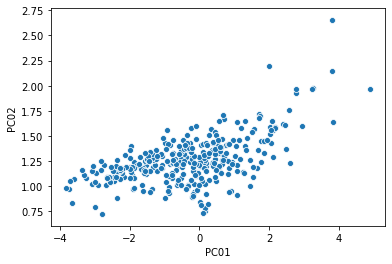

In [118]:
sns.scatterplot(x="PC01", y="PC02", data=Fe_num_pca_df1.loc[area_numbers[area_numbers["time"] == "Pg"].index, :])
plt.show();

In [119]:
def create_dendrogram(data, linkage_method='ward', save=""):
    """Plot dendrogram
    
    Parameters:
    -----------
    data : array or DataFrame
        Data to be clustered
    linkage_method : str (optional)
        Method to use to construct the linkage matrix
        Choose between ['single', 'complete', 'average',
        'weighted', 'centroid', 'median', 'ward']
        For detailed information see 
        https://docs.scipy.org/doc/scipy-0.14.0/reference/ \
        generated/scipy.cluster.hierarchy.linkage.html
    save : str (optional)
        Name to use for figure file when saving
    """
    
    linkage_matrix = linkage(data, linkage_method)
    c, coph_dists = cophenet(linkage_matrix, pdist(data))
    print("Cophenetic correlation coefficient:", c)
    
    plt.figure(figsize=(25, 10))
    dendrogram(linkage_matrix, labels=data.index)
    if save != "":
        plt.savefig(f"../_FIGURES/{save}.pdf")
    plt.show()

Cophenetic correlation coefficient: 0.5310100829704336


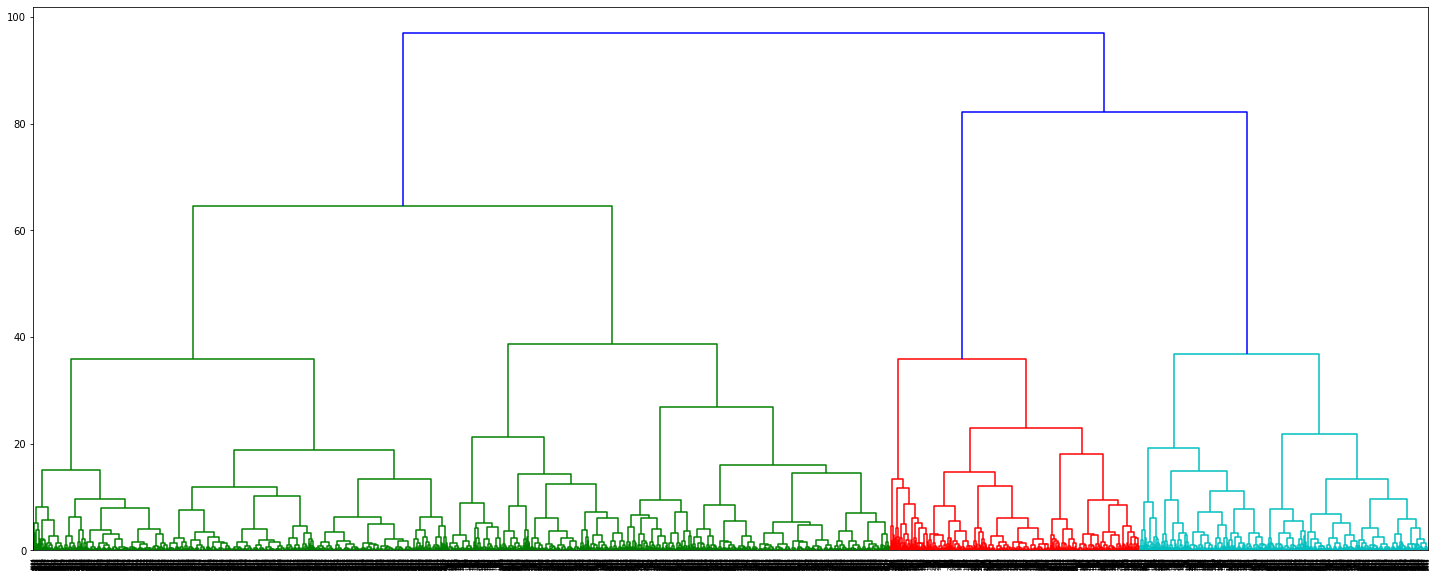

Wall time: 1min 44s


In [120]:
%%time
create_dendrogram(Fe_num_pca_df1, linkage_method='ward')

In [145]:
X = Fe_num_pca_df1.values

cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

array([0, 1, 2, ..., 3, 3, 3], dtype=int64)

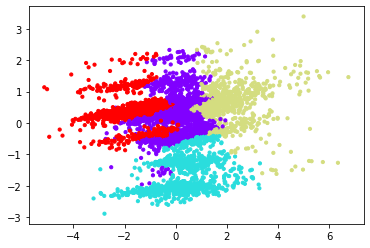

In [146]:
plt.scatter(X[:,0], X[:,1], c=cluster.labels_, cmap='rainbow', s=10)
plt.show();

In [147]:
# You can call the 'labels_' attribute of 'cluster' here instead of 
# performing the 'fit_transform' operation again.
cluster_groups_Fe= pd.DataFrame(data=cluster.labels_)

In [148]:
cluster_groups_Fe

,0
0,0
1,1
2,2
3,0
4,0
...,...
4650,3
4651,3
4652,3
4653,3


In [149]:
area_numbers = pd.read_excel("../_INTERPOLATION/area_subdivided.xlsx", index_col=0, usecols=[0, 24, 29])
#area_numbers = pd.read_excel("../_INTERPOLATION/area1.xlsx", index_col=None, usecols=[0, 24, 29])

In [150]:
clustering_Fe = pd.concat([area_numbers, cluster_groups_Fe], axis = 1)
clustering_Fe = clustering_Fe.dropna()

In [151]:
clustering_Fe

,time,area,0
1,K,2.0,1.0
2,Tr,1.0,2.0
3,K,3.0,0.0
4,K,3.0,0.0
5,K,4.0,2.0
...,...,...,...
4650,Pg,2.0,3.0
4651,K,4.0,3.0
4652,K,3.0,3.0
4653,K,3.0,3.0


In [152]:
clustering_Fe.to_excel("../_CLUSTER/groups_time_area/Frost/Fe/cluster_control_points.xlsx", index=True)

In [153]:
clustering_Fe

,time,area,0
1,K,2.0,1.0
2,Tr,1.0,2.0
3,K,3.0,0.0
4,K,3.0,0.0
5,K,4.0,2.0
...,...,...,...
4650,Pg,2.0,3.0
4651,K,4.0,3.0
4652,K,3.0,3.0
4653,K,3.0,3.0


In [154]:
clustering_Fe.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/Fe/control_points_count.xlsx")

-----

In [155]:
clustering_Fe1= clustering_Fe.loc[clustering_Fe['area'] == 1]
clustering_Fe2= clustering_Fe.loc[clustering_Fe['area'] == 2]
clustering_Fe3= clustering_Fe.loc[clustering_Fe['area'] == 3]
clustering_Fe4= clustering_Fe.loc[clustering_Fe['area'] == 4]
clustering_Fe5= clustering_Fe.loc[clustering_Fe['area'] == 5]

In [156]:
clustering_Fe1_J = clustering_Fe1.loc[clustering_Fe1['time'] == 'J']
clustering_Fe1_Tr = clustering_Fe1.loc[clustering_Fe1['time'] == 'Tr']
clustering_Fe1_Tr_J = clustering_Fe1.loc[clustering_Fe1['time'] == 'Tr-J']
clustering_Fe1_Mz = clustering_Fe1.loc[clustering_Fe1['time'] == 'Mz']
clustering_Fe1_K = clustering_Fe1.loc[clustering_Fe1['time'] == 'K']

clustering_Fe1_J.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/Fe/groups_counts_area1_J.xlsx")
clustering_Fe1_Tr.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/Fe/groups_counts_area1_Tr.xlsx")
clustering_Fe1_Tr_J.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/Fe/groups_counts_area1_Tr_J.xlsx")
clustering_Fe1_Mz.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/Fe/groups_counts_area1_Mz.xlsx")
clustering_Fe1_K.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/Fe/groups_counts_area1_K.xlsx")

In [157]:
clustering_Fe2_J = clustering_Fe2.loc[clustering_Fe2['time'] == 'J']
clustering_Fe2_Tr = clustering_Fe2.loc[clustering_Fe2['time'] == 'Tr']
clustering_Fe2_Pg = clustering_Fe2.loc[clustering_Fe2['time'] == 'Pg']
clustering_Fe2_K = clustering_Fe2.loc[clustering_Fe2['time'] == 'K']

clustering_Fe2_J.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/Fe/groups_counts_area2_J.xlsx")
clustering_Fe2_Tr.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/Fe/groups_counts_area2_Tr.xlsx")
clustering_Fe2_Pg.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/Fe/groups_counts_area2_Pg.xlsx")
clustering_Fe2_K.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/Fe/groups_counts_area2_K.xlsx")

In [158]:
clustering_Fe3_J = clustering_Fe3.loc[clustering_Fe3['time'] == 'J']
clustering_Fe3_Tr = clustering_Fe3.loc[clustering_Fe3['time'] == 'Tr']
clustering_Fe3_Pg = clustering_Fe3.loc[clustering_Fe3['time'] == 'Pg']
clustering_Fe3_K = clustering_Fe3.loc[clustering_Fe3['time'] == 'K']

clustering_Fe3_J.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/Fe/groups_counts_area3_J.xlsx")
clustering_Fe3_Tr.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/Fe/groups_counts_area3_Tr.xlsx")
clustering_Fe3_Pg.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/Fe/groups_counts_area3_Pg.xlsx")
clustering_Fe3_K.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/Fe/groups_counts_area3_K.xlsx")

In [159]:
clustering_Fe4_J = clustering_Fe4.loc[clustering_Fe4['time'] == 'J']
clustering_Fe4_Mz = clustering_Fe4.loc[clustering_Fe4['time'] == 'Mz']
clustering_Fe4_Pg = clustering_Fe4.loc[clustering_Fe4['time'] == 'Pg']
clustering_Fe4_K = clustering_Fe4.loc[clustering_Fe4['time'] == 'K']

clustering_Fe4_J.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/Fe/groups_counts_area4_J.xlsx")
clustering_Fe4_Mz.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/Fe/groups_counts_area4_Mz.xlsx")
clustering_Fe4_Pg.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/Fe/groups_counts_area4_Pg.xlsx")
clustering_Fe4_K.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/Fe/groups_counts_area4_K.xlsx")

In [160]:
clustering_Fe5_Mz = clustering_Fe5.loc[clustering_Fe5['time'] == 'Mz']
clustering_Fe5_Pg = clustering_Fe5.loc[clustering_Fe5['time'] == 'Pg']
clustering_Fe5_K = clustering_Fe5.loc[clustering_Fe5['time'] == 'K']

clustering_Fe5_Mz.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/Fe/groups_counts_area5_Mz.xlsx")
clustering_Fe5_Pg.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/Fe/groups_counts_area5_Pg.xlsx")
clustering_Fe5_K.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/Fe/groups_counts_area5_K.xlsx")

----

In [161]:
coordinates = pd.read_excel("../_PETRO/classification_altereddata.xlsx", index_col=0, usecols=[0, 5, 6])
#coordinates = pd.read_excel("../_INTERPOLATION/area5.xlsx", index_col=0, usecols=[0, 5, 6])

In [162]:
cluster_plot_Fe = pd.concat([coordinates, clustering_Fe], axis=1)
cluster_plot_Fe = cluster_plot_Fe.dropna()

In [163]:
cluster_plot_Fe

,Latitude,Longitude,time,area,0
1,"44°31'30.0""","138°37'30.0""",K,2.0,1.0
2,"54°12'10.0""","119°24'0.0""",Tr,1.0,2.0
3,"62°36'0.0""","155°36'0.0""",K,3.0,0.0
4,"61°35'0.0""","146°2'0.0""",K,3.0,0.0
5,"68°55'0.0""","164°24'0.0""",K,4.0,2.0
...,...,...,...,...,...
4650,"52°49'0.0""","140°55'0.0""",Pg,2.0,3.0
4651,"68°41'0.0""","161°59'0.0""",K,4.0,3.0
4652,"62°24'0.0""","159°58'0.0""",K,3.0,3.0
4653,"60°27'0.0""","150°1'0.0""",K,3.0,3.0


In [164]:
cluster_plot_Fe.to_excel("../_CLUSTER/groups_time_area/Frost/Fe/groups_try.xlsx", index=True)

### MALI

In [290]:
MALI_pca_df

,PC01,PC02,PC03,PC04
1,-0.827174,-0.739167,0.216790,-0.495705
2,-2.494915,1.494976,0.262915,-0.759574
3,-1.675787,-1.080789,1.970778,-2.200408
4,-1.195268,-0.795357,0.041206,0.154680
5,0.494244,-0.412661,-0.180380,-0.935829
...,...,...,...,...
4655,2.907331,0.330423,0.088884,0.574958
4656,3.700744,0.515804,0.622215,0.175209
4657,3.320462,1.285927,0.789499,-0.242171
4658,3.460611,0.522763,-0.198883,1.248328


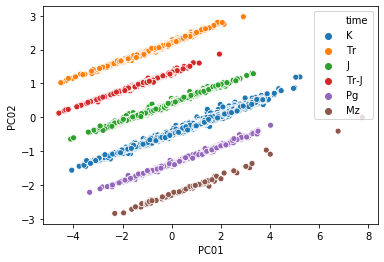

In [291]:
sns.scatterplot(x="PC01", y="PC02", data=MALI_pca_df, hue=metadata["time"])
plt.show();

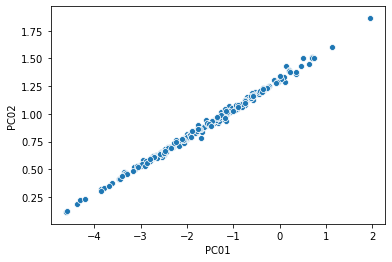

In [292]:
sns.scatterplot(x="PC01", y="PC02", data=MALI_pca_df.loc[area_numbers[area_numbers["time"] == "Tr-J"].index, :])
plt.show();

In [293]:
def create_dendrogram(data, linkage_method='ward', save=""):
    """Plot dendrogram
    
    Parameters:
    -----------
    data : array or DataFrame
        Data to be clustered
    linkage_method : str (optional)
        Method to use to construct the linkage matrix
        Choose between ['single', 'complete', 'average',
        'weighted', 'centroid', 'median', 'ward']
        For detailed information see 
        https://docs.scipy.org/doc/scipy-0.14.0/reference/ \
        generated/scipy.cluster.hierarchy.linkage.html
    save : str (optional)
        Name to use for figure file when saving
    """
    
    linkage_matrix = linkage(data, linkage_method)
    c, coph_dists = cophenet(linkage_matrix, pdist(data))
    print("Cophenetic correlation coefficient:", c)
    
    plt.figure(figsize=(25, 10))
    dendrogram(linkage_matrix, labels=data.index)
    if save != "":
        plt.savefig(f"../_FIGURES/{save}.pdf")
    plt.show()

Cophenetic correlation coefficient: 0.5160392338647108


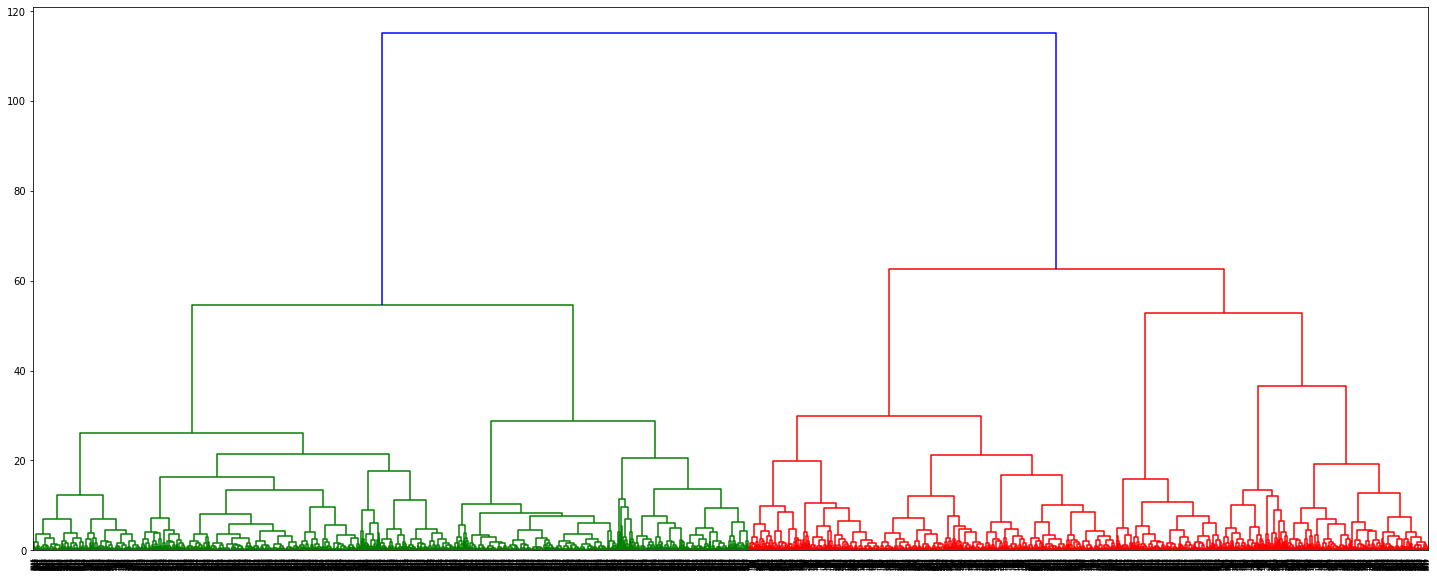

Wall time: 1min 55s


In [294]:
%%time
create_dendrogram(MALI_pca_df, linkage_method='ward')

In [296]:
X = MALI_pca_df.values

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

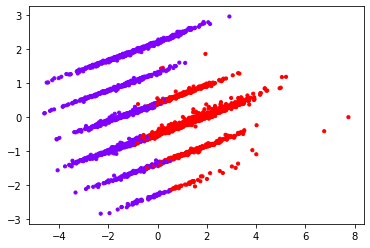

In [297]:
plt.scatter(X[:,0], X[:,1], c=cluster.labels_, cmap='rainbow', s=10)
plt.show();

In [298]:
# You can call the 'labels_' attribute of 'cluster' here instead of 
# performing the 'fit_transform' operation again.
cluster_groups_MALI= pd.DataFrame(data=cluster.labels_)

In [299]:
cluster_groups_MALI

,0
0,1
1,0
2,0
3,0
4,1
...,...
4650,1
4651,1
4652,1
4653,1


In [300]:
area_numbers = pd.read_excel("../_INTERPOLATION/area_subdivided.xlsx", index_col=0, usecols=[0, 24, 29])

In [301]:
clustering_MALI = pd.concat([area_numbers, cluster_groups_MALI], axis = 1)
clustering_MALI = clustering_MALI.dropna()

In [302]:
clustering_MALI

,time,area,0
1,K,2.0,0.0
2,Tr,1.0,0.0
3,K,3.0,0.0
4,K,3.0,1.0
5,K,4.0,0.0
...,...,...,...
4650,Pg,2.0,1.0
4651,K,4.0,1.0
4652,K,3.0,1.0
4653,K,3.0,1.0


In [303]:
clustering_MALI.to_excel("../_CLUSTER/groups_time_area/Frost/MALI/cluster_control_points.xlsx", index=True)

In [304]:
clustering_MALI.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/MALI/control_points_count.xlsx")

In [305]:
clustering_MALI1= clustering_MALI.loc[clustering_MALI['area'] == 1]
clustering_MALI2= clustering_MALI.loc[clustering_MALI['area'] == 2]
clustering_MALI3= clustering_MALI.loc[clustering_MALI['area'] == 3]
clustering_MALI4= clustering_MALI.loc[clustering_MALI['area'] == 4]
clustering_MALI5= clustering_MALI.loc[clustering_MALI['area'] == 5]

In [306]:
clustering_MALI1_J = clustering_MALI1.loc[clustering_MALI1['time'] == 'J']
clustering_MALI1_Tr = clustering_MALI1.loc[clustering_MALI1['time'] == 'Tr']
clustering_MALI1_Tr_J = clustering_MALI1.loc[clustering_MALI1['time'] == 'Tr-J']
clustering_MALI1_Mz = clustering_MALI1.loc[clustering_MALI1['time'] == 'Mz']
clustering_MALI1_K = clustering_MALI1.loc[clustering_MALI1['time'] == 'K']

clustering_MALI1_J.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/MALI/groups_counts_area1_J.xlsx")
clustering_MALI1_Tr.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/MALI/groups_counts_area1_Tr.xlsx")
clustering_MALI1_Tr_J.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/MALI/groups_counts_area1_Tr_J.xlsx")
clustering_MALI1_Mz.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/MALI/groups_counts_area1_Mz.xlsx")
clustering_MALI1_K.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/MALI/groups_counts_area1_K.xlsx")

In [307]:
clustering_MALI2_J = clustering_MALI2.loc[clustering_MALI2['time'] == 'J']
clustering_MALI2_Tr = clustering_MALI2.loc[clustering_MALI2['time'] == 'Tr']
clustering_MALI2_Pg = clustering_MALI2.loc[clustering_MALI2['time'] == 'Pg']
clustering_MALI2_K = clustering_MALI2.loc[clustering_MALI2['time'] == 'K']

clustering_MALI2_J.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/MALI/groups_counts_area2_J.xlsx")
clustering_MALI2_Tr.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/MALI/groups_counts_area2_Tr.xlsx")
clustering_MALI2_Pg.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/MALI/groups_counts_area2_Pg.xlsx")
clustering_MALI2_K.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/MALI/groups_counts_area2_K.xlsx")

In [308]:
clustering_MALI3_J = clustering_MALI3.loc[clustering_MALI3['time'] == 'J']
clustering_MALI3_Tr = clustering_MALI3.loc[clustering_MALI3['time'] == 'Tr']
clustering_MALI3_Pg = clustering_MALI3.loc[clustering_MALI3['time'] == 'Pg']
clustering_MALI3_K = clustering_MALI3.loc[clustering_MALI3['time'] == 'K']

clustering_MALI3_J.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/MALI/groups_counts_area3_J.xlsx")
clustering_MALI3_Tr.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/MALI/groups_counts_area3_Tr.xlsx")
clustering_MALI3_Pg.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/MALI/groups_counts_area3_Pg.xlsx")
clustering_MALI3_K.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/MALI/groups_counts_area3_K.xlsx")

In [309]:
clustering_MALI4_J = clustering_MALI4.loc[clustering_MALI4['time'] == 'J']
clustering_MALI4_Mz = clustering_MALI4.loc[clustering_MALI4['time'] == 'Mz']
clustering_MALI4_Pg = clustering_MALI4.loc[clustering_MALI4['time'] == 'Pg']
clustering_MALI4_K = clustering_MALI4.loc[clustering_MALI4['time'] == 'K']

clustering_MALI4_J.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/MALI/groups_counts_area4_J.xlsx")
clustering_MALI4_Mz.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/MALI/groups_counts_area4_Mz.xlsx")
clustering_MALI4_Pg.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/MALI/groups_counts_area4_Pg.xlsx")
clustering_MALI4_K.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/MALI/groups_counts_area4_K.xlsx")

In [310]:
clustering_MALI5_Mz = clustering_MALI5.loc[clustering_MALI5['time'] == 'Mz']
clustering_MALI5_Pg = clustering_MALI5.loc[clustering_MALI5['time'] == 'Pg']
clustering_MALI5_K = clustering_MALI5.loc[clustering_MALI5['time'] == 'K']

clustering_MALI5_Mz.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/MALI/groups_counts_area5_Mz.xlsx")
clustering_MALI5_Pg.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/MALI/groups_counts_area5_Pg.xlsx")
clustering_MALI5_K.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/MALI/groups_counts_area5_K.xlsx")

In [311]:
cluster_plot_MALI = pd.concat([coordinates, clustering_MALI], axis=1)
cluster_plot_MALI = cluster_plot_MALI.dropna()

In [312]:
cluster_plot_MALI

,Latitude,Longitude,time,area,0
1,"44°31'30.0""","138°37'30.0""",K,2.0,0.0
2,"54°12'10.0""","119°24'0.0""",Tr,1.0,0.0
3,"62°36'0.0""","155°36'0.0""",K,3.0,0.0
4,"61°35'0.0""","146°2'0.0""",K,3.0,1.0
5,"68°55'0.0""","164°24'0.0""",K,4.0,0.0
...,...,...,...,...,...
4650,"52°49'0.0""","140°55'0.0""",Pg,2.0,1.0
4651,"68°41'0.0""","161°59'0.0""",K,4.0,1.0
4652,"62°24'0.0""","159°58'0.0""",K,3.0,1.0
4653,"60°27'0.0""","150°1'0.0""",K,3.0,1.0


In [313]:
cluster_plot_MALI.to_excel("../_CLUSTER/groups_time_area/Frost/MALI/groups_try.xlsx", index=True)

-----

### ASI

In [405]:
ASI_pca_df

,PC01,PC02
1,-3.129589,0.066185
2,-0.828522,0.218808
3,-3.109170,0.358199
4,-3.447589,-0.306264
5,-2.603669,0.050945
...,...,...
4655,5.080092,-0.056126
4656,4.337160,-0.139548
4657,5.193980,-0.182987
4658,4.970317,0.186895


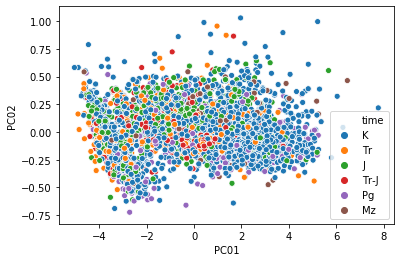

In [406]:
sns.scatterplot(x="PC01", y="PC02", data=ASI_pca_df, hue=metadata["time"])
plt.show();

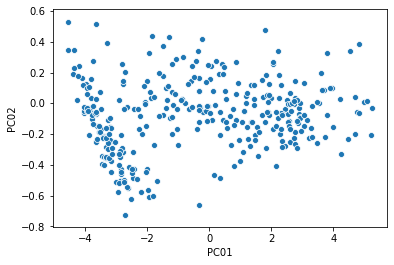

In [407]:
sns.scatterplot(x="PC01", y="PC02", data=ASI_pca_df.loc[area_numbers[area_numbers["time"] == "Pg"].index, :])
plt.show();

In [408]:
def create_dendrogram(data, linkage_method='ward', save=""):
    """Plot dendrogram
    
    Parameters:
    -----------
    data : array or DataFrame
        Data to be clustered
    linkage_method : str (optional)
        Method to use to construct the linkage matrix
        Choose between ['single', 'complete', 'average',
        'weighted', 'centroid', 'median', 'ward']
        For detailed information see 
        https://docs.scipy.org/doc/scipy-0.14.0/reference/ \
        generated/scipy.cluster.hierarchy.linkage.html
    save : str (optional)
        Name to use for figure file when saving
    """
    
    linkage_matrix = linkage(data, linkage_method)
    c, coph_dists = cophenet(linkage_matrix, pdist(data))
    print("Cophenetic correlation coefficient:", c)
    
    plt.figure(figsize=(25, 10))
    dendrogram(linkage_matrix, labels=data.index)
    if save != "":
        plt.savefig(f"../_FIGURES/{save}.pdf")
    plt.show()

Cophenetic correlation coefficient: 0.7531548541841976


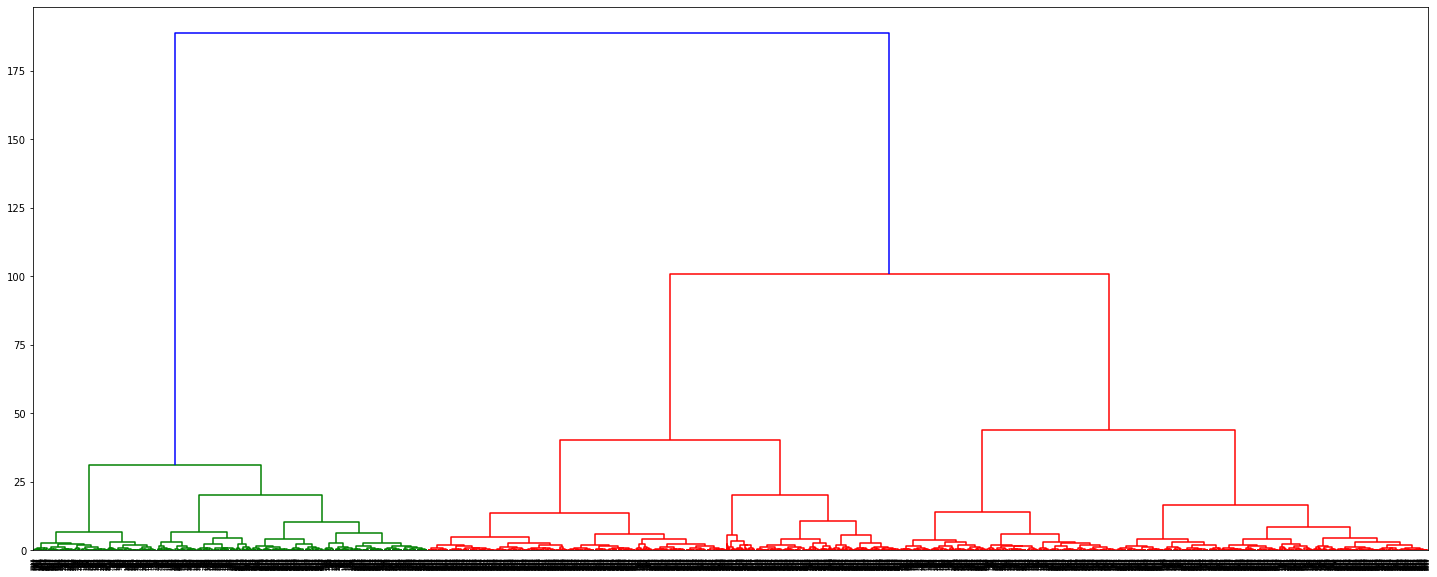

Wall time: 1min 50s


In [409]:
%%time
create_dendrogram(ASI_pca_df, linkage_method='ward')

In [410]:
X = ASI_pca_df.values

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

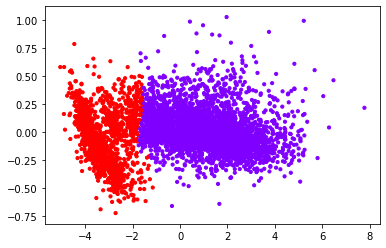

In [411]:
plt.scatter(X[:,0], X[:,1], c=cluster.labels_, cmap='rainbow', s=10)
plt.show();

In [412]:
# You can call the 'labels_' attribute of 'cluster' here instead of 
# performing the 'fit_transform' operation again.
cluster_groups_ASI= pd.DataFrame(data=cluster.labels_)

In [413]:
cluster_groups_ASI

,0
0,1
1,0
2,1
3,1
4,1
...,...
4654,0
4655,0
4656,0
4657,0


In [414]:
area_numbers = pd.read_excel("../_INTERPOLATION/area_subdivided.xlsx", index_col=0, usecols=[0, 24, 29])

In [415]:
clustering_ASI = pd.concat([area_numbers, cluster_groups_ASI], axis = 1)
clustering_ASI = clustering_ASI.dropna()

In [416]:
clustering_ASI

,time,area,0
1,K,2.0,0.0
2,Tr,1.0,1.0
3,K,3.0,1.0
4,K,3.0,1.0
5,K,4.0,0.0
...,...,...,...
4653,K,3.0,0.0
4654,K,2.0,0.0
4655,K,4.0,0.0
4656,K,2.0,0.0


In [417]:
clustering_ASI.to_excel("../_CLUSTER/groups_time_area/Frost/ASI/cluster_control_points.xlsx", index=True)

In [418]:
clustering_ASI.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/ASI/control_points_count.xlsx")

In [419]:
clustering_ASI1= clustering_ASI.loc[clustering_ASI['area'] == 1]
clustering_ASI2= clustering_ASI.loc[clustering_ASI['area'] == 2]
clustering_ASI3= clustering_ASI.loc[clustering_ASI['area'] == 3]
clustering_ASI4= clustering_ASI.loc[clustering_ASI['area'] == 4]
clustering_ASI5= clustering_ASI.loc[clustering_ASI['area'] == 5]

In [420]:
clustering_ASI1_J = clustering_ASI1.loc[clustering_ASI1['time'] == 'J']
clustering_ASI1_Tr = clustering_ASI1.loc[clustering_ASI1['time'] == 'Tr']
clustering_ASI1_Tr_J = clustering_ASI1.loc[clustering_ASI1['time'] == 'Tr-J']
clustering_ASI1_Mz = clustering_ASI1.loc[clustering_ASI1['time'] == 'Mz']
clustering_ASI1_K = clustering_ASI1.loc[clustering_ASI1['time'] == 'K']

clustering_ASI1_J.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/ASI/groups_counts_area1_J.xlsx")
clustering_ASI1_Tr.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/ASI/groups_counts_area1_Tr.xlsx")
clustering_ASI1_Tr_J.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/ASI/groups_counts_area1_Tr_J.xlsx")
clustering_ASI1_Mz.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/ASI/groups_counts_area1_Mz.xlsx")
clustering_ASI1_K.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/ASI/groups_counts_area1_K.xlsx")

In [421]:
clustering_ASI2_J = clustering_ASI2.loc[clustering_ASI2['time'] == 'J']
clustering_ASI2_Tr = clustering_ASI2.loc[clustering_ASI2['time'] == 'Tr']
clustering_ASI2_Pg = clustering_ASI2.loc[clustering_ASI2['time'] == 'Pg']
clustering_ASI2_K = clustering_ASI2.loc[clustering_ASI2['time'] == 'K']

clustering_ASI2_J.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/ASI/groups_counts_area2_J.xlsx")
clustering_ASI2_Tr.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/ASI/groups_counts_area2_Tr.xlsx")
clustering_ASI2_Pg.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/ASI/groups_counts_area2_Pg.xlsx")
clustering_ASI2_K.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/ASI/groups_counts_area2_K.xlsx")

In [422]:
clustering_ASI3_J = clustering_ASI3.loc[clustering_ASI3['time'] == 'J']
clustering_ASI3_Tr = clustering_ASI3.loc[clustering_ASI3['time'] == 'Tr']
clustering_ASI3_Pg = clustering_ASI3.loc[clustering_ASI3['time'] == 'Pg']
clustering_ASI3_K = clustering_ASI3.loc[clustering_ASI3['time'] == 'K']

clustering_ASI3_J.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/ASI/groups_counts_area3_J.xlsx")
clustering_ASI3_Tr.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/ASI/groups_counts_area3_Tr.xlsx")
clustering_ASI3_Pg.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/ASI/groups_counts_area3_Pg.xlsx")
clustering_ASI3_K.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/ASI/groups_counts_area3_K.xlsx")

In [423]:
clustering_ASI4_J = clustering_ASI4.loc[clustering_ASI4['time'] == 'J']
clustering_ASI4_Mz = clustering_ASI4.loc[clustering_ASI4['time'] == 'Mz']
clustering_ASI4_Pg = clustering_ASI4.loc[clustering_ASI4['time'] == 'Pg']
clustering_ASI4_K = clustering_ASI4.loc[clustering_ASI4['time'] == 'K']

clustering_ASI4_J.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/ASI/groups_counts_area4_J.xlsx")
clustering_ASI4_Mz.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/ASI/groups_counts_area4_Mz.xlsx")
clustering_ASI4_Pg.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/ASI/groups_counts_area4_Pg.xlsx")
clustering_ASI4_K.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/ASI/groups_counts_area4_K.xlsx")

In [424]:
clustering_ASI5_Mz = clustering_ASI5.loc[clustering_ASI5['time'] == 'Mz']
clustering_ASI5_Pg = clustering_ASI5.loc[clustering_ASI5['time'] == 'Pg']
clustering_ASI5_K = clustering_ASI5.loc[clustering_ASI5['time'] == 'K']

clustering_ASI5_Mz.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/ASI/groups_counts_area5_Mz.xlsx")
clustering_ASI5_Pg.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/ASI/groups_counts_area5_Pg.xlsx")
clustering_ASI5_K.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/ASI/groups_counts_area5_K.xlsx")

In [425]:
cluster_plot_ASI = pd.concat([coordinates, clustering_ASI], axis=1)
cluster_plot_ASI = cluster_plot_ASI.dropna()

In [426]:
cluster_plot_ASI

,Latitude,Longitude,time,area,0
1,"44°31'30.0""","138°37'30.0""",K,2.0,0.0
2,"54°12'10.0""","119°24'0.0""",Tr,1.0,1.0
3,"62°36'0.0""","155°36'0.0""",K,3.0,1.0
4,"61°35'0.0""","146°2'0.0""",K,3.0,1.0
5,"68°55'0.0""","164°24'0.0""",K,4.0,0.0
...,...,...,...,...,...
4653,"60°27'0.0""","150°1'0.0""",K,3.0,0.0
4654,"46°28'40.0""","136°34'0.0""",K,2.0,0.0
4655,"66°42'0.0""","164°23'0.0""",K,4.0,0.0
4656,"46°56'30.0""","137°5'3.0""",K,2.0,0.0


In [427]:
cluster_plot_ASI.to_excel("../_CLUSTER/groups_time_area/Frost/ASI/groups_try.xlsx", index=True)

----

### combined groups

In [428]:
cluster_Fe = pd.read_excel("../_CLUSTER/groups_time_area/Frost/Fe/cluster_control_points.xlsx", index=True, usecols =[0, 1, 2, 3])
cluster_MALI = pd.read_excel("../_CLUSTER/groups_time_area/Frost/MALI/cluster_control_points.xlsx", index=True, usecols =[0, 3])
cluster_ASI = pd.read_excel("../_CLUSTER/groups_time_area/Frost/ASI/cluster_control_points.xlsx", index=True, usecols =[0, 3])

In [429]:
cluster_Fe.columns = ["index", "time", "area", "group1"]
cluster_Fe = cluster_Fe.set_index('index')

cluster_MALI.columns = ["index", "group2"]
cluster_MALI = cluster_MALI.set_index('index')

cluster_ASI.columns = ["index", "group3"]
cluster_ASI = cluster_ASI.set_index('index')


In [430]:
cluster_Fe["group1"] = (cluster_Fe["group1"] +1) 
cluster_MALI["group2"] = (cluster_MALI["group2"] +1) * 10
cluster_ASI["group3"] = (cluster_ASI["group3"] +1) * 100

In [431]:
cluster_ASI

,group3
index,
1,100
2,200
3,200
4,200
5,100
...,...
4653,100
4654,100
4655,100


In [432]:
cluster_Fe

,time,area,group1
index,,,
1,K,2,1
2,Tr,1,1
3,K,3,1
4,K,3,1
5,K,4,1
...,...,...,...
4653,K,3,2
4654,K,2,2
4655,K,4,2


In [433]:
cluster_frost = pd.concat([cluster_Fe, cluster_MALI, cluster_ASI], axis = 1)

In [434]:
cluster_frost['group'] = cluster_frost['group1']+cluster_frost['group2']+cluster_frost['group3']

In [435]:
cluster_frost = cluster_frost.drop('group1', 1)
cluster_frost = cluster_frost.drop('group2', 1)
cluster_frost = cluster_frost.drop('group3', 1)

In [436]:
cluster_frost

,time,area,group
index,,,
1,K,2,121
2,Tr,1,221
3,K,3,221
4,K,3,211
5,K,4,121
...,...,...,...
4653,K,3,112
4654,K,2,112
4655,K,4,112


In [437]:
cluster_frost.to_excel("../_CLUSTER/groups_time_area/Frost/combined/cluster_control_points.xlsx", index=True)

In [438]:
cluster_frost.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/combined/control_points_count.xlsx")

In [439]:
clustering1= cluster_frost.loc[cluster_frost['area'] == 1]
clustering2= cluster_frost.loc[cluster_frost['area'] == 2]
clustering3= cluster_frost.loc[cluster_frost['area'] == 3]
clustering4= cluster_frost.loc[cluster_frost['area'] == 4]
clustering5= cluster_frost.loc[cluster_frost['area'] == 5]

In [440]:
clustering1_J = clustering1.loc[clustering1['time'] == 'J']
clustering1_Tr = clustering1.loc[clustering1['time'] == 'Tr']
clustering1_Tr_J = clustering1.loc[clustering1['time'] == 'Tr-J']
clustering1_Mz = clustering1.loc[clustering1['time'] == 'Mz']
clustering1_K = clustering1.loc[clustering1['time'] == 'K']

clustering1_J.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/combined/groups_counts_area1_J.xlsx")
clustering1_Tr.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/combined/groups_counts_area1_Tr.xlsx")
clustering1_Tr_J.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/combined/groups_counts_area1_Tr_J.xlsx")
clustering1_Mz.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/combined/groups_counts_area1_Mz.xlsx")
clustering1_K.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/combined/groups_counts_area1_K.xlsx")

In [441]:
clustering2_J = clustering2.loc[clustering2['time'] == 'J']
clustering2_Tr = clustering2.loc[clustering2['time'] == 'Tr']
clustering2_Pg = clustering2.loc[clustering2['time'] == 'Pg']
clustering2_K = clustering2.loc[clustering2['time'] == 'K']

clustering2_J.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/combined/groups_counts_area2_J.xlsx")
clustering2_Tr.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/combined/groups_counts_area2_Tr.xlsx")
clustering2_Pg.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/combined/groups_counts_area2_Pg.xlsx")
clustering2_K.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/combined/groups_counts_area2_K.xlsx")

In [442]:
clustering3_J = clustering3.loc[clustering3['time'] == 'J']
clustering3_Tr = clustering3.loc[clustering3['time'] == 'Tr']
clustering3_Pg = clustering3.loc[clustering3['time'] == 'Pg']
clustering3_K = clustering3.loc[clustering3['time'] == 'K']

clustering3_J.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/combined/groups_counts_area3_J.xlsx")
clustering3_Tr.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/combined/groups_counts_area3_Tr.xlsx")
clustering3_Pg.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/combined/groups_counts_area3_Pg.xlsx")
clustering3_K.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/combined/groups_counts_area3_K.xlsx")

In [443]:
clustering4_J = clustering4.loc[clustering4['time'] == 'J']
clustering4_Mz = clustering4.loc[clustering4['time'] == 'Mz']
clustering4_Pg = clustering4.loc[clustering4['time'] == 'Pg']
clustering4_K = clustering4.loc[clustering4['time'] == 'K']

clustering4_J.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/combined/groups_counts_area4_J.xlsx")
clustering4_Mz.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/combined/groups_counts_area4_Mz.xlsx")
clustering4_Pg.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/combined/groups_counts_area4_Pg.xlsx")
clustering4_K.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/combined/groups_counts_area4_K.xlsx")

In [444]:
clustering5_Mz = clustering5.loc[clustering5['time'] == 'Mz']
clustering5_Pg = clustering5.loc[clustering5['time'] == 'Pg']
clustering5_K = clustering5.loc[clustering5['time'] == 'K']

clustering5_Mz.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/combined/groups_counts_area5_Mz.xlsx")
clustering5_Pg.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/combined/groups_counts_area5_Pg.xlsx")
clustering5_K.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/Frost/combined/groups_counts_area5_K.xlsx")

In [445]:
cluster_plot = pd.concat([coordinates, cluster_frost], axis=1)
cluster_plot = cluster_plot.dropna()

In [446]:
cluster_plot

,Latitude,Longitude,time,area,group
1,"44°31'30.0""","138°37'30.0""",K,2.0,121.0
2,"54°12'10.0""","119°24'0.0""",Tr,1.0,221.0
3,"62°36'0.0""","155°36'0.0""",K,3.0,221.0
4,"61°35'0.0""","146°2'0.0""",K,3.0,211.0
5,"68°55'0.0""","164°24'0.0""",K,4.0,121.0
...,...,...,...,...,...
4653,"60°27'0.0""","150°1'0.0""",K,3.0,112.0
4654,"46°28'40.0""","136°34'0.0""",K,2.0,112.0
4655,"66°42'0.0""","164°23'0.0""",K,4.0,112.0
4656,"46°56'30.0""","137°5'3.0""",K,2.0,112.0


In [447]:
cluster_plot.to_excel("../_CLUSTER/groups_time_area/Frost/combined/groups_try.xlsx", index=True)